(multfile-line-doc)=
# Batch line fitting

In most cases, you are interested in fitting multiple lines accross multiple spectra.

This can be done easily with the [$\tt{lime.Spectrum.fit.frame}$](../3_explanations/0_measurements.rst) function.

First, we are going to load the data:

In [1]:
import lime

# State the data files
data_folder = '../0_resources/spectra'
obsFitsFile = f'{data_folder}/gp121903_osiris.fits'
lineBandsFile = '../0_resources/bands/gp121903_bands.txt'
cfgFile = '../0_resources/long_slit.toml'
osiris_gp_df_path = '../0_resources/bands/osiris_green_peas_linesDF.txt'

# Load configuration
obs_cfg = lime.load_cfg(cfgFile)
z_obj = obs_cfg['osiris']['gp121903']['z']
norm_flux = obs_cfg['osiris']['norm_flux']

# Declare LiMe spectrum
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)

Now, we run the command to measure the lines in the frame we prepared in [the previous tutorial](../2_guides/1_prepare_line_bands.ipynb):

In [2]:
# Line fitting
gp_spec.fit.frame(bands=lineBandsFile, fit_cfg=obs_cfg, obj_cfg_prefix='gp121903_osiris', line_detection=True, update_default=True)


Line fitting progress (continuum fitting) (line detection):
[==========] 100% of 28 lines (O2_7325A_b)

The fitted profiles can be checked with the $\tt{lime.Spectrum.plot.grid}$ function:

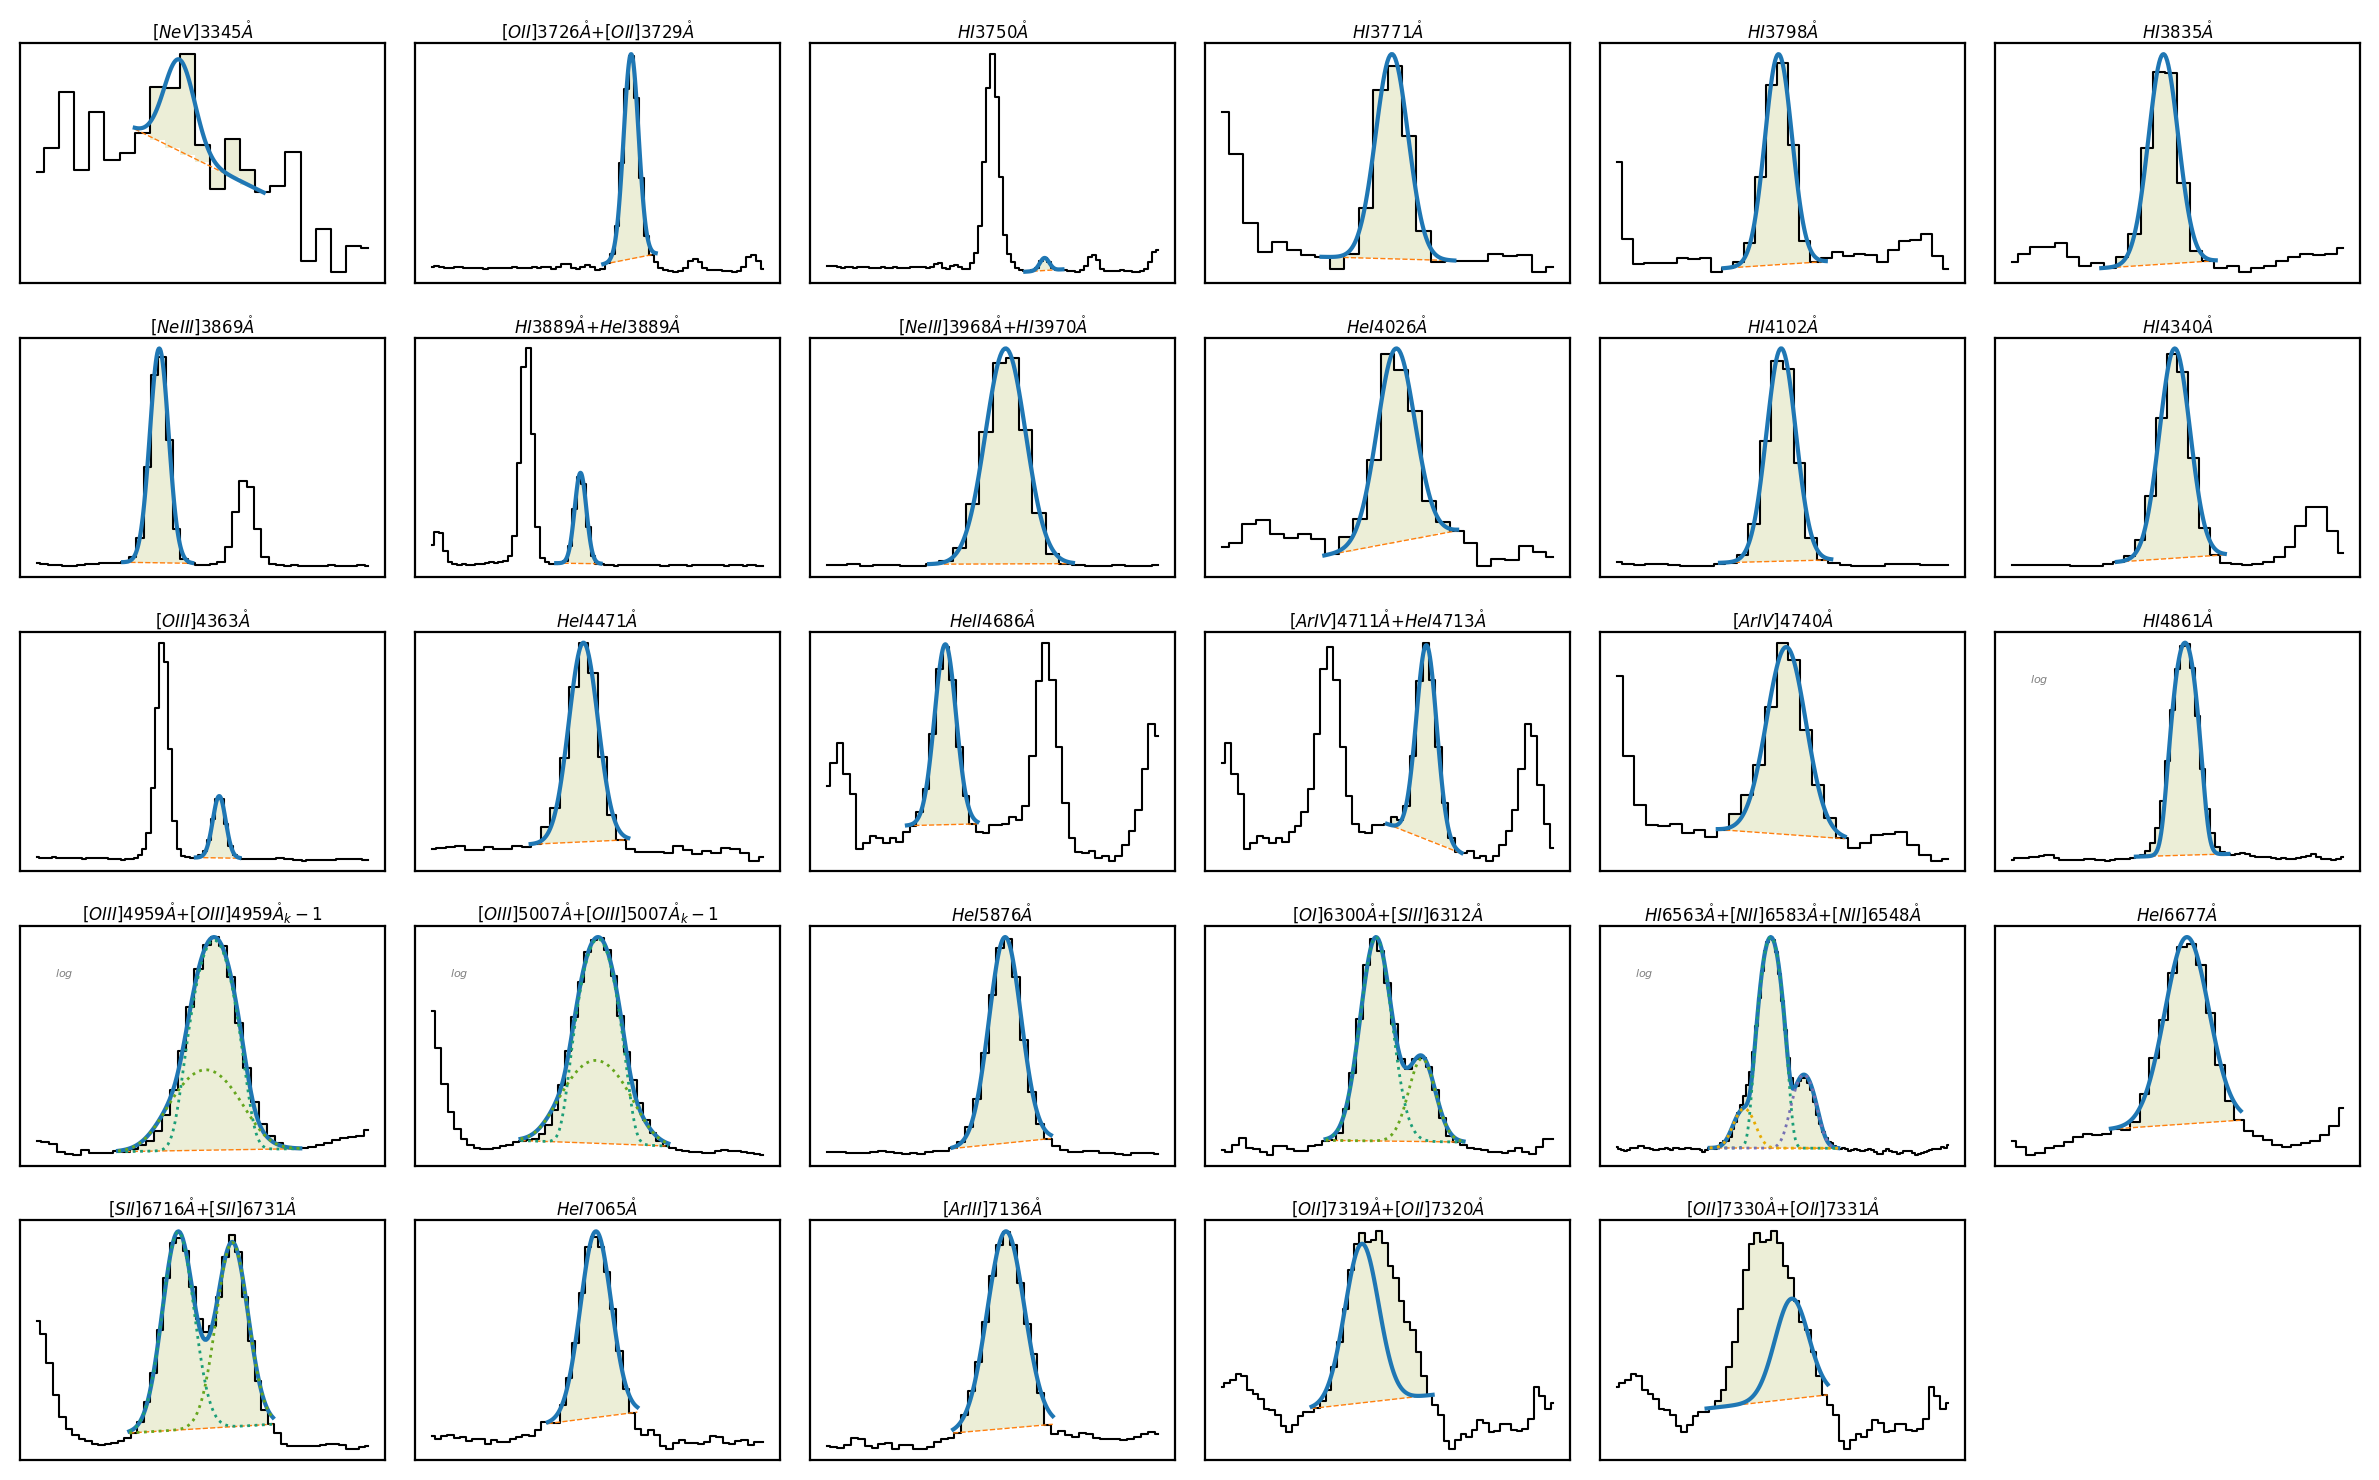

In [3]:
gp_spec.plot.grid()

Behind the scenes, the [$\tt{lime.Spectrum.fit.frame}$](../3_explanations/0_measurements.rst) function performs multiple tasks:

* When ``line_detection=True``, it runs the [continuum fitting](../2_guides/3_continuum_fitting.ipynb) and [peak detection](../2_guides/4_line_detection.ipynb) algorithms described in the previous tutorials. The arguments for these functions are read from the input ``fit_cfg``. The progress bar will display the message *(continuum fitting)* *(line detection)* if these processes are active.
* The fitting configuration from the ``default_line_fitting`` section is updated with the entries from ``gp121903_osiris_line_fitting``:


## Multi-level configuration files:

If we look at the input **defaulft line fitting** configuration: 

In [4]:
import pprint
pprint.pprint(obs_cfg['default_line_fitting'])

{'Ar4_4711A_m': 'Ar4_4711A+He1_4713A',
 'Fe3_4925A_m': 'He1_4922A+Fe3_4925A',
 'H1_3889A_m': 'H1_3889A+He1_3889A',
 'H1_6563A_b': 'H1_6563A+N2_6583A+N2_6548A',
 'H1_6563A_m': 'H1_6563A+N2_6583A+N2_6548A',
 'N1_5198A_m': 'N1_5198A+N1_5200A',
 'Ne3_3968A_m': 'Ne3_3968A+H1_3970A',
 'O1_6300A_b': 'O1_6300A+S3_6312A',
 'O2_3726A_b': 'O2_3726A+O2_3729A',
 'O2_3726A_m': 'O2_3726A+O2_3729A',
 'O2_7319A_m': 'O2_7319A+O2_7320A',
 'O2_7325A_b': 'O2_7319A_m+O2_7330A_m',
 'O2_7325A_m': 'O2_7319A_m+O2_7330A_m',
 'O2_7330A_m': 'O2_7330A+O2_7331A',
 'O3_5007A_b': 'O3_4959A+O3_5007A',
 'O3_5007A_m': 'O3_4959A+O3_5007A',
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6716A_m': 'S2_6716A+S2_6731A',
 'continuum': {'degree_list': [3, 6, 6], 'emis_threshold': [3, 2, 1.5]},
 'peaks_troughs': {'sigma_threshold': 3},
 'transitions': {'O2_3726A_m': {'wavelength': 3728.484},
                 'O2_7325A_b': {'wavelength': 7325.0},
                 'O2_7325A_m': {'wavelength': 7325.0}}}


and the **object line fitting** configuration:

In [5]:
pprint.pprint(obs_cfg['gp121903_osiris_line_fitting'])

{'H1_6563A_b': 'H1_6563A+N2_6583A+N2_6548A',
 'N2_6548A_amp': {'expr': 'N2_6583A_amp/2.94'},
 'N2_6548A_kinem': 'N2_6583A',
 'O2_7330A_m_kinem': 'O2_7319A_m',
 'O3_4959A_b': 'O3_4959A+O3_4959A_k-1',
 'O3_4959A_k-1_amp': {'expr': '<100.0*O3_4959A_amp', 'min': 0.0},
 'O3_4959A_k-1_sigma': {'expr': '>2.0*O3_4959A_sigma'},
 'O3_5007A_b': 'O3_5007A+O3_5007A_k-1',
 'O3_5007A_k-1_amp': {'expr': '<100.0*O3_5007A_amp', 'min': 0.0},
 'O3_5007A_k-1_sigma': {'expr': '>2.0*O3_5007A_sigma'},
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6731A_kinem': 'S2_6716A',
 'grouped_lines': ['O3_5007A_b', 'O3_4959A_b'],
 'map_band_vsigma': {'H1_4861A': 200,
                     'H1_6563A': 200,
                     'N2_6548A': 200,
                     'N2_6583A': 200,
                     'O3_4959A': 250,
                     'O3_5007A': 250},
 'rejected_lines': ['H1_3722A',
                    'H1_3734A',
                    'Fe3_4008A',
                    'S2_4076A',
                    'Fe2_4358A',
           

we notice the following differences:

* The **defaulft line fitting** section includes [the components for the composite lines](../1_introduction/2_line_labels.ipynb), the parameters for the [continuum fitting](../2_guides/3_continuum_fitting.ipynb) and [peak_troughs thresholding](../2_guides/4_line_detection.ipynb) and the wavelength definition for some merged lines.
* The **object line fitting** also includes components for [a few composite lines](../1_introduction/2_line_labels.ipynb), the [fitting parameter constrains](../1_introduction/5_fitting_configuration.ipynb) for the blended profiles, and the grouped and rejected line lists for the [$\texttt{lime.Spectrum.retrieve.lines\_frame}$](../1_introduction/1_observations.ipynb).

In the default behaviour, when ``update_default=True``, the **default line fitting** configuration entries are updated with the **object line fitting** entries. For example, in the previous fitting, this is what $\mathrm{LiMe}$ sees:


In [6]:
input_cfg = obs_cfg['default_line_fitting'].copy()
input_cfg.update(obs_cfg['gp121903_osiris_line_fitting'])
pprint.pprint(input_cfg)

{'Ar4_4711A_m': 'Ar4_4711A+He1_4713A',
 'Fe3_4925A_m': 'He1_4922A+Fe3_4925A',
 'H1_3889A_m': 'H1_3889A+He1_3889A',
 'H1_6563A_b': 'H1_6563A+N2_6583A+N2_6548A',
 'H1_6563A_m': 'H1_6563A+N2_6583A+N2_6548A',
 'N1_5198A_m': 'N1_5198A+N1_5200A',
 'N2_6548A_amp': {'expr': 'N2_6583A_amp/2.94'},
 'N2_6548A_kinem': 'N2_6583A',
 'Ne3_3968A_m': 'Ne3_3968A+H1_3970A',
 'O1_6300A_b': 'O1_6300A+S3_6312A',
 'O2_3726A_b': 'O2_3726A+O2_3729A',
 'O2_3726A_m': 'O2_3726A+O2_3729A',
 'O2_7319A_m': 'O2_7319A+O2_7320A',
 'O2_7325A_b': 'O2_7319A_m+O2_7330A_m',
 'O2_7325A_m': 'O2_7319A_m+O2_7330A_m',
 'O2_7330A_m': 'O2_7330A+O2_7331A',
 'O2_7330A_m_kinem': 'O2_7319A_m',
 'O3_4959A_b': 'O3_4959A+O3_4959A_k-1',
 'O3_4959A_k-1_amp': {'expr': '<100.0*O3_4959A_amp', 'min': 0.0},
 'O3_4959A_k-1_sigma': {'expr': '>2.0*O3_4959A_sigma'},
 'O3_5007A_b': 'O3_5007A+O3_5007A_k-1',
 'O3_5007A_k-1_amp': {'expr': '<100.0*O3_5007A_amp', 'min': 0.0},
 'O3_5007A_k-1_sigma': {'expr': '>2.0*O3_5007A_sigma'},
 'O3_5007A_m': 'O3_4959

In this case, all the information has been combined, and the common entries (such as the ``O3_5007A_b`` definition) in the default line fitting are replaced by the object configuration.

<div class="alert alert-success">

**Please note:** If ``update_default=False``, the algorithm will use the **object line fitting** configuration when available; otherwise, it will fall back to the **default line fitting**. For example, if we run:

</div>

In [7]:
gp_spec.clear_data()
gp_spec.fit.frame(bands=lineBandsFile, fit_cfg=obs_cfg, obj_cfg_prefix='gp121903_osiris', line_detection=True, update_default=False)

LiMe CRITICAL: Automatic line detection but the input configuration does not include a "continuum" entry with a "degree_list" and "emis_threshold" keys
LiMe WARNING: No "continuum" entry in input configuration file. No continuum fitting will be applied
LiMe WARNING: No "peaks_troughs" entry in input configuration file. No line thresholding will be applied



Line fitting progress (line detection):
[=         ] 10% of 38 lines (O2_3726A_m)

LiMe WARNING: The O2_3726A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[==        ] 26% of 38 lines (H1_3889A_m)

LiMe WARNING: The H1_3889A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[==        ] 28% of 38 lines (Ne3_3968A_m)

LiMe WARNING: The Ne3_3968A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[=====     ] 57% of 38 lines (Ar4_4711A_m)

LiMe WARNING: The Ar4_4711A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[======    ] 65% of 38 lines (Fe3_4925A_m)

LiMe WARNING: The Fe3_4925A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[=======   ] 73% of 38 lines (N1_5198A_m)

LiMe WARNING: The N1_5198A_m line has a "_m" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[========  ] 81% of 38 lines (O1_6300A_b)

LiMe WARNING: The O1_6300A_b line has a "_b" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line


[========= ] 97% of 38 lines (O2_7325A_b)

LiMe WARNING: The O2_7325A_b line has a "_b" suffix but its group lines components were not found  on the input configuration file or lines database. It will be treated a single line
LiMe WARNING: Line O2_7325A was not found on the input bands database. It won't be measured


[==========] 100% of 38 lines (Ar3_7751A)

You can understand from the warnings that $\mathrm{LiMe}$ did not find the components for some of lines, nor the ``continuum`` and ``peaks_troughs`` parameters, because those were only in the ``default_line_fitting``. However for $H\alpha$:

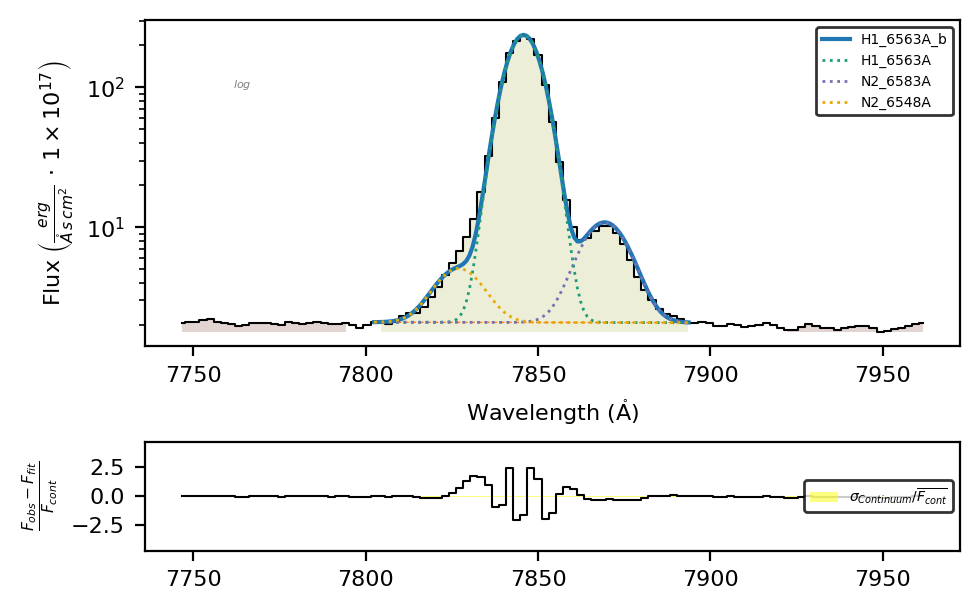

In [8]:
gp_spec.plot.bands('H1_6563A')

All the components are fitted because those were available the ``gp121903_osiris_line_fitting`` section.

### Multiple-spectra fitting

By combining the multi-level fitting configuration, we can easily fit the lines from multiple spectra. The code below loops through the spectra in the [resources folder](https://github.com/Vital-Fernandez/lime/tree/master/examples/0_resources), prepares a lines frame for each object using the configuration data, and finally runs the continuum fitting, line thresholding, and line fitting with the [$\tt{lime.Spectrum.fit.frame}$](../3_explanations/0_measurements.rst) function.

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1.000000045813705e-18.



 gp121903 osiris 0.19531

Line fitting progress (continuum fitting) (line detection):
[==========] 100% of 28 lines (O2_7325A_b)

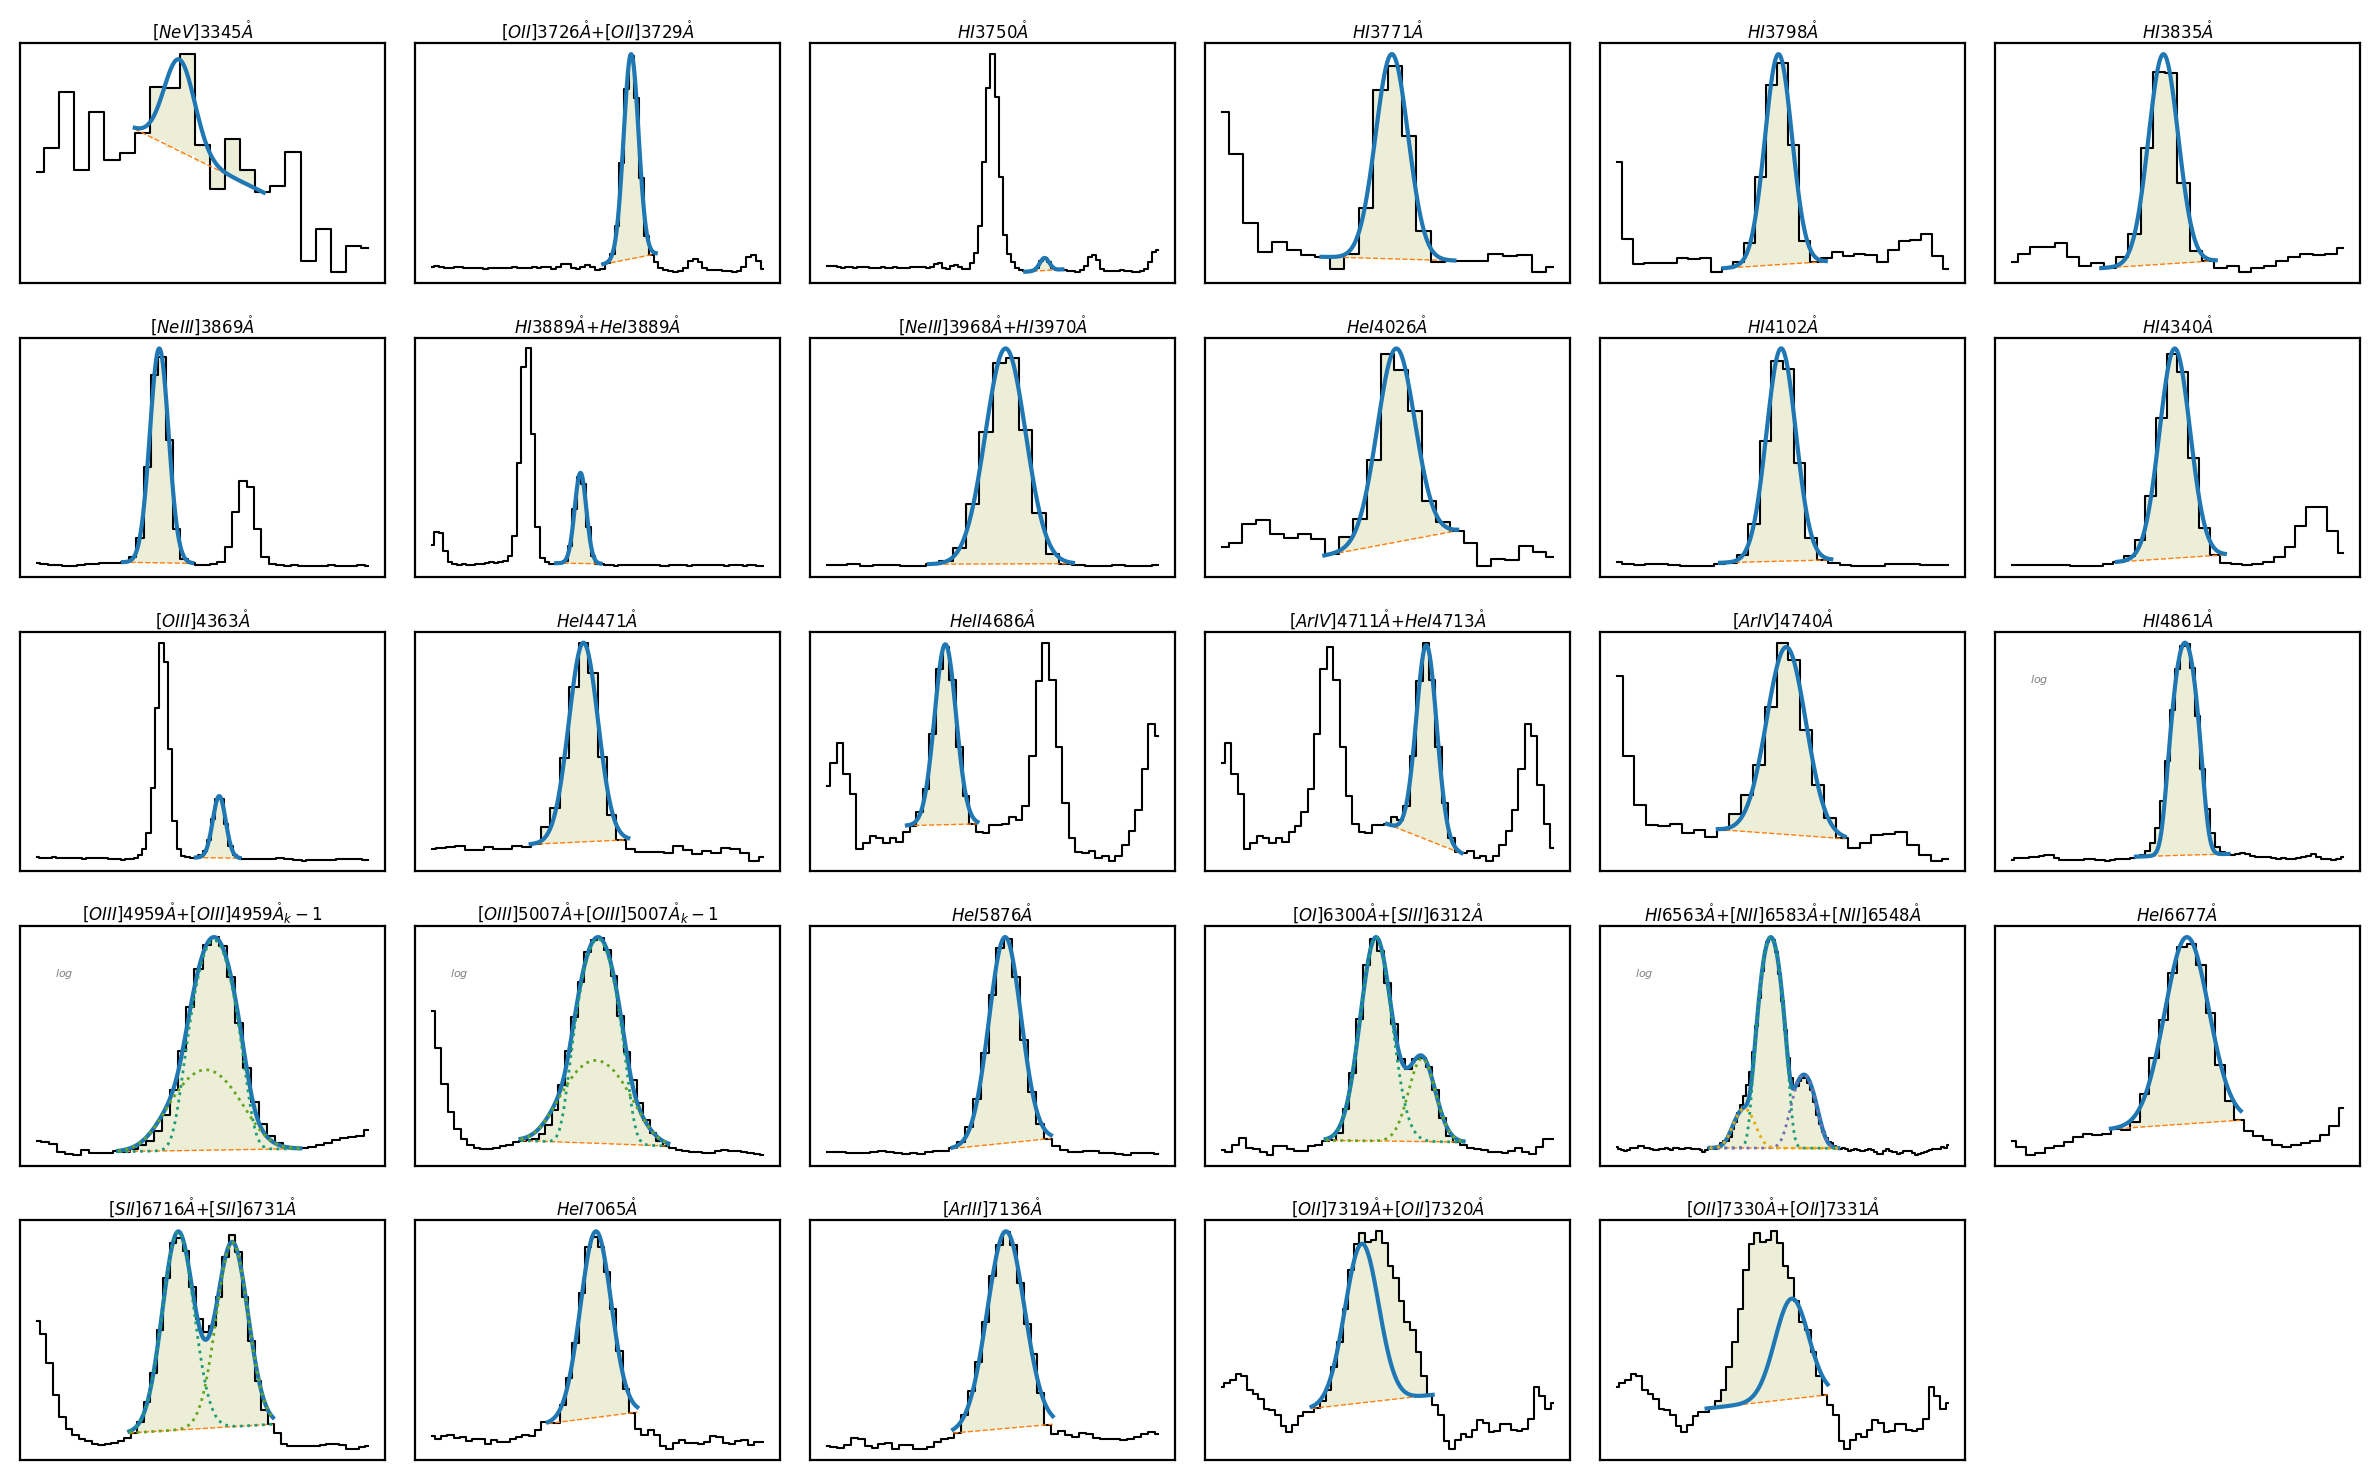

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-08.
LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-21.



 ceers1027 nirspec 7.8189

Line fitting progress (continuum fitting) (line detection):
[==========] 100% of 5 lines (O3_5007A)

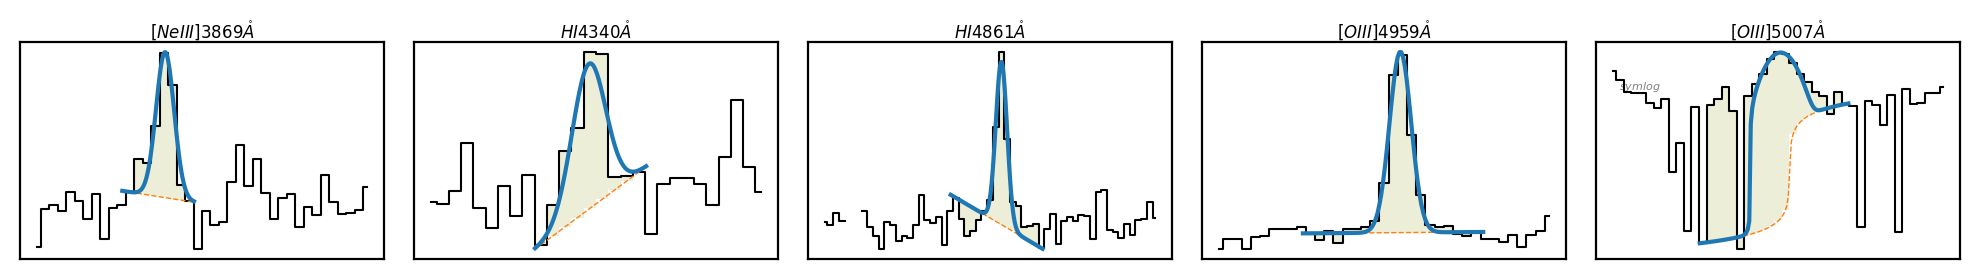

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 9.99999983775159e-18.



 Izw18 isis 0.0026

Line fitting progress (continuum fitting) (line detection):
[=         ] 15% of 19 lines (He1_4388A)

LiMe WARNING: Gaussian fit uncertainty estimation failed for He1_4388A


[==========] 100% of 19 lines (O2_7325A_b)

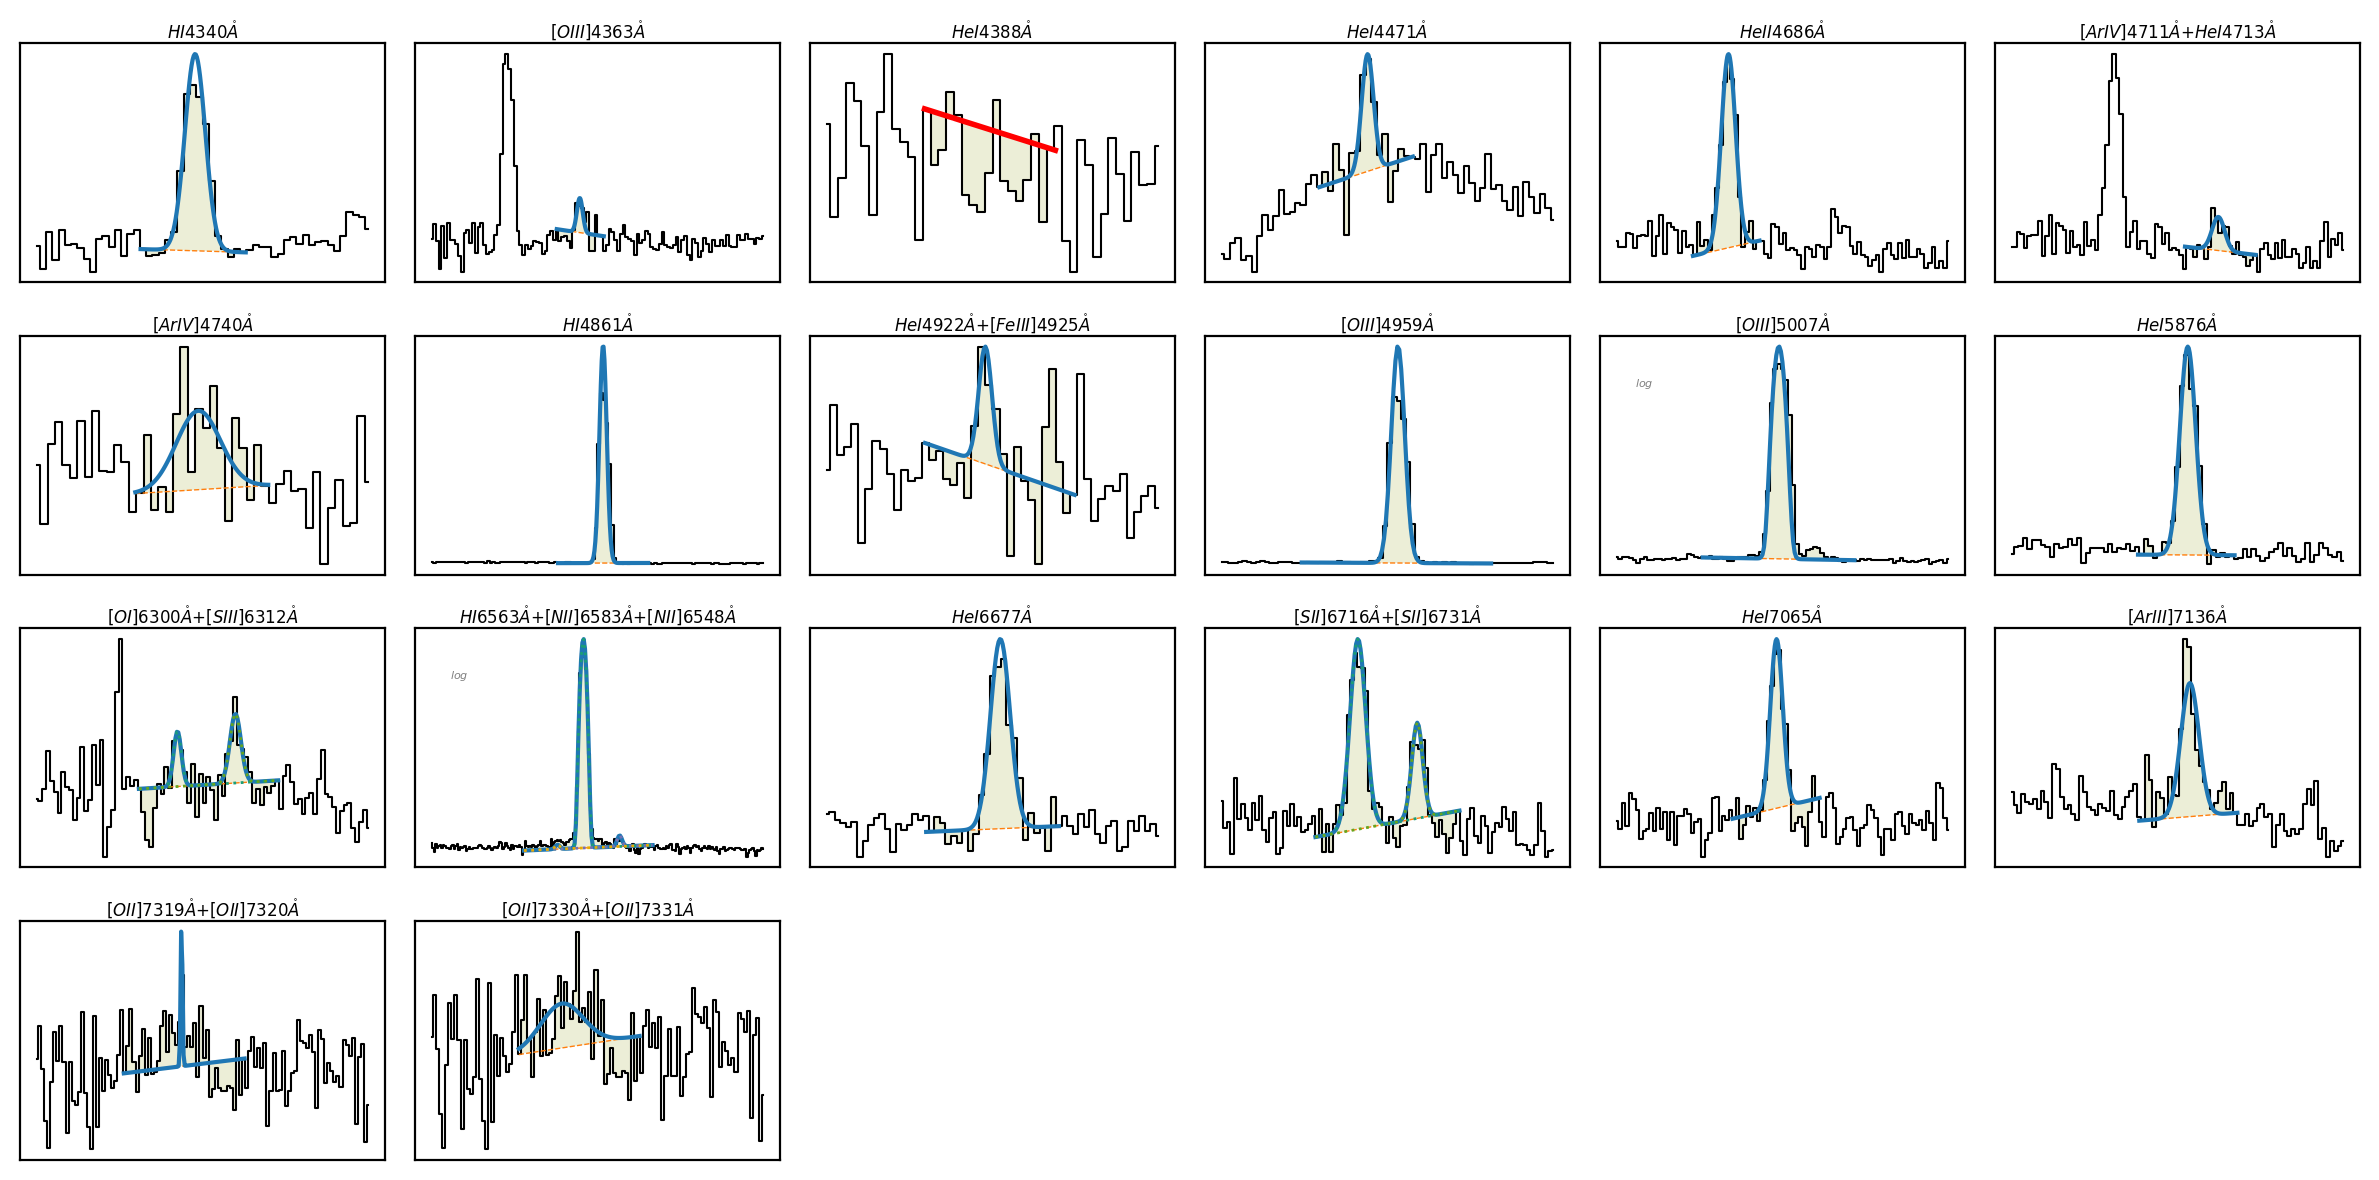

LiMe WARNING: Line H1_3721A was not found on the database



 SHOC579 sdss 0.0475

Line fitting progress (continuum fitting) (line detection):
[==        ] 23% of 34 lines (H1_3889A_m)

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/lmfit/models.py:320: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/lmfit/models.py:320: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)


[==========] 100% of 34 lines (H1_8750A)))

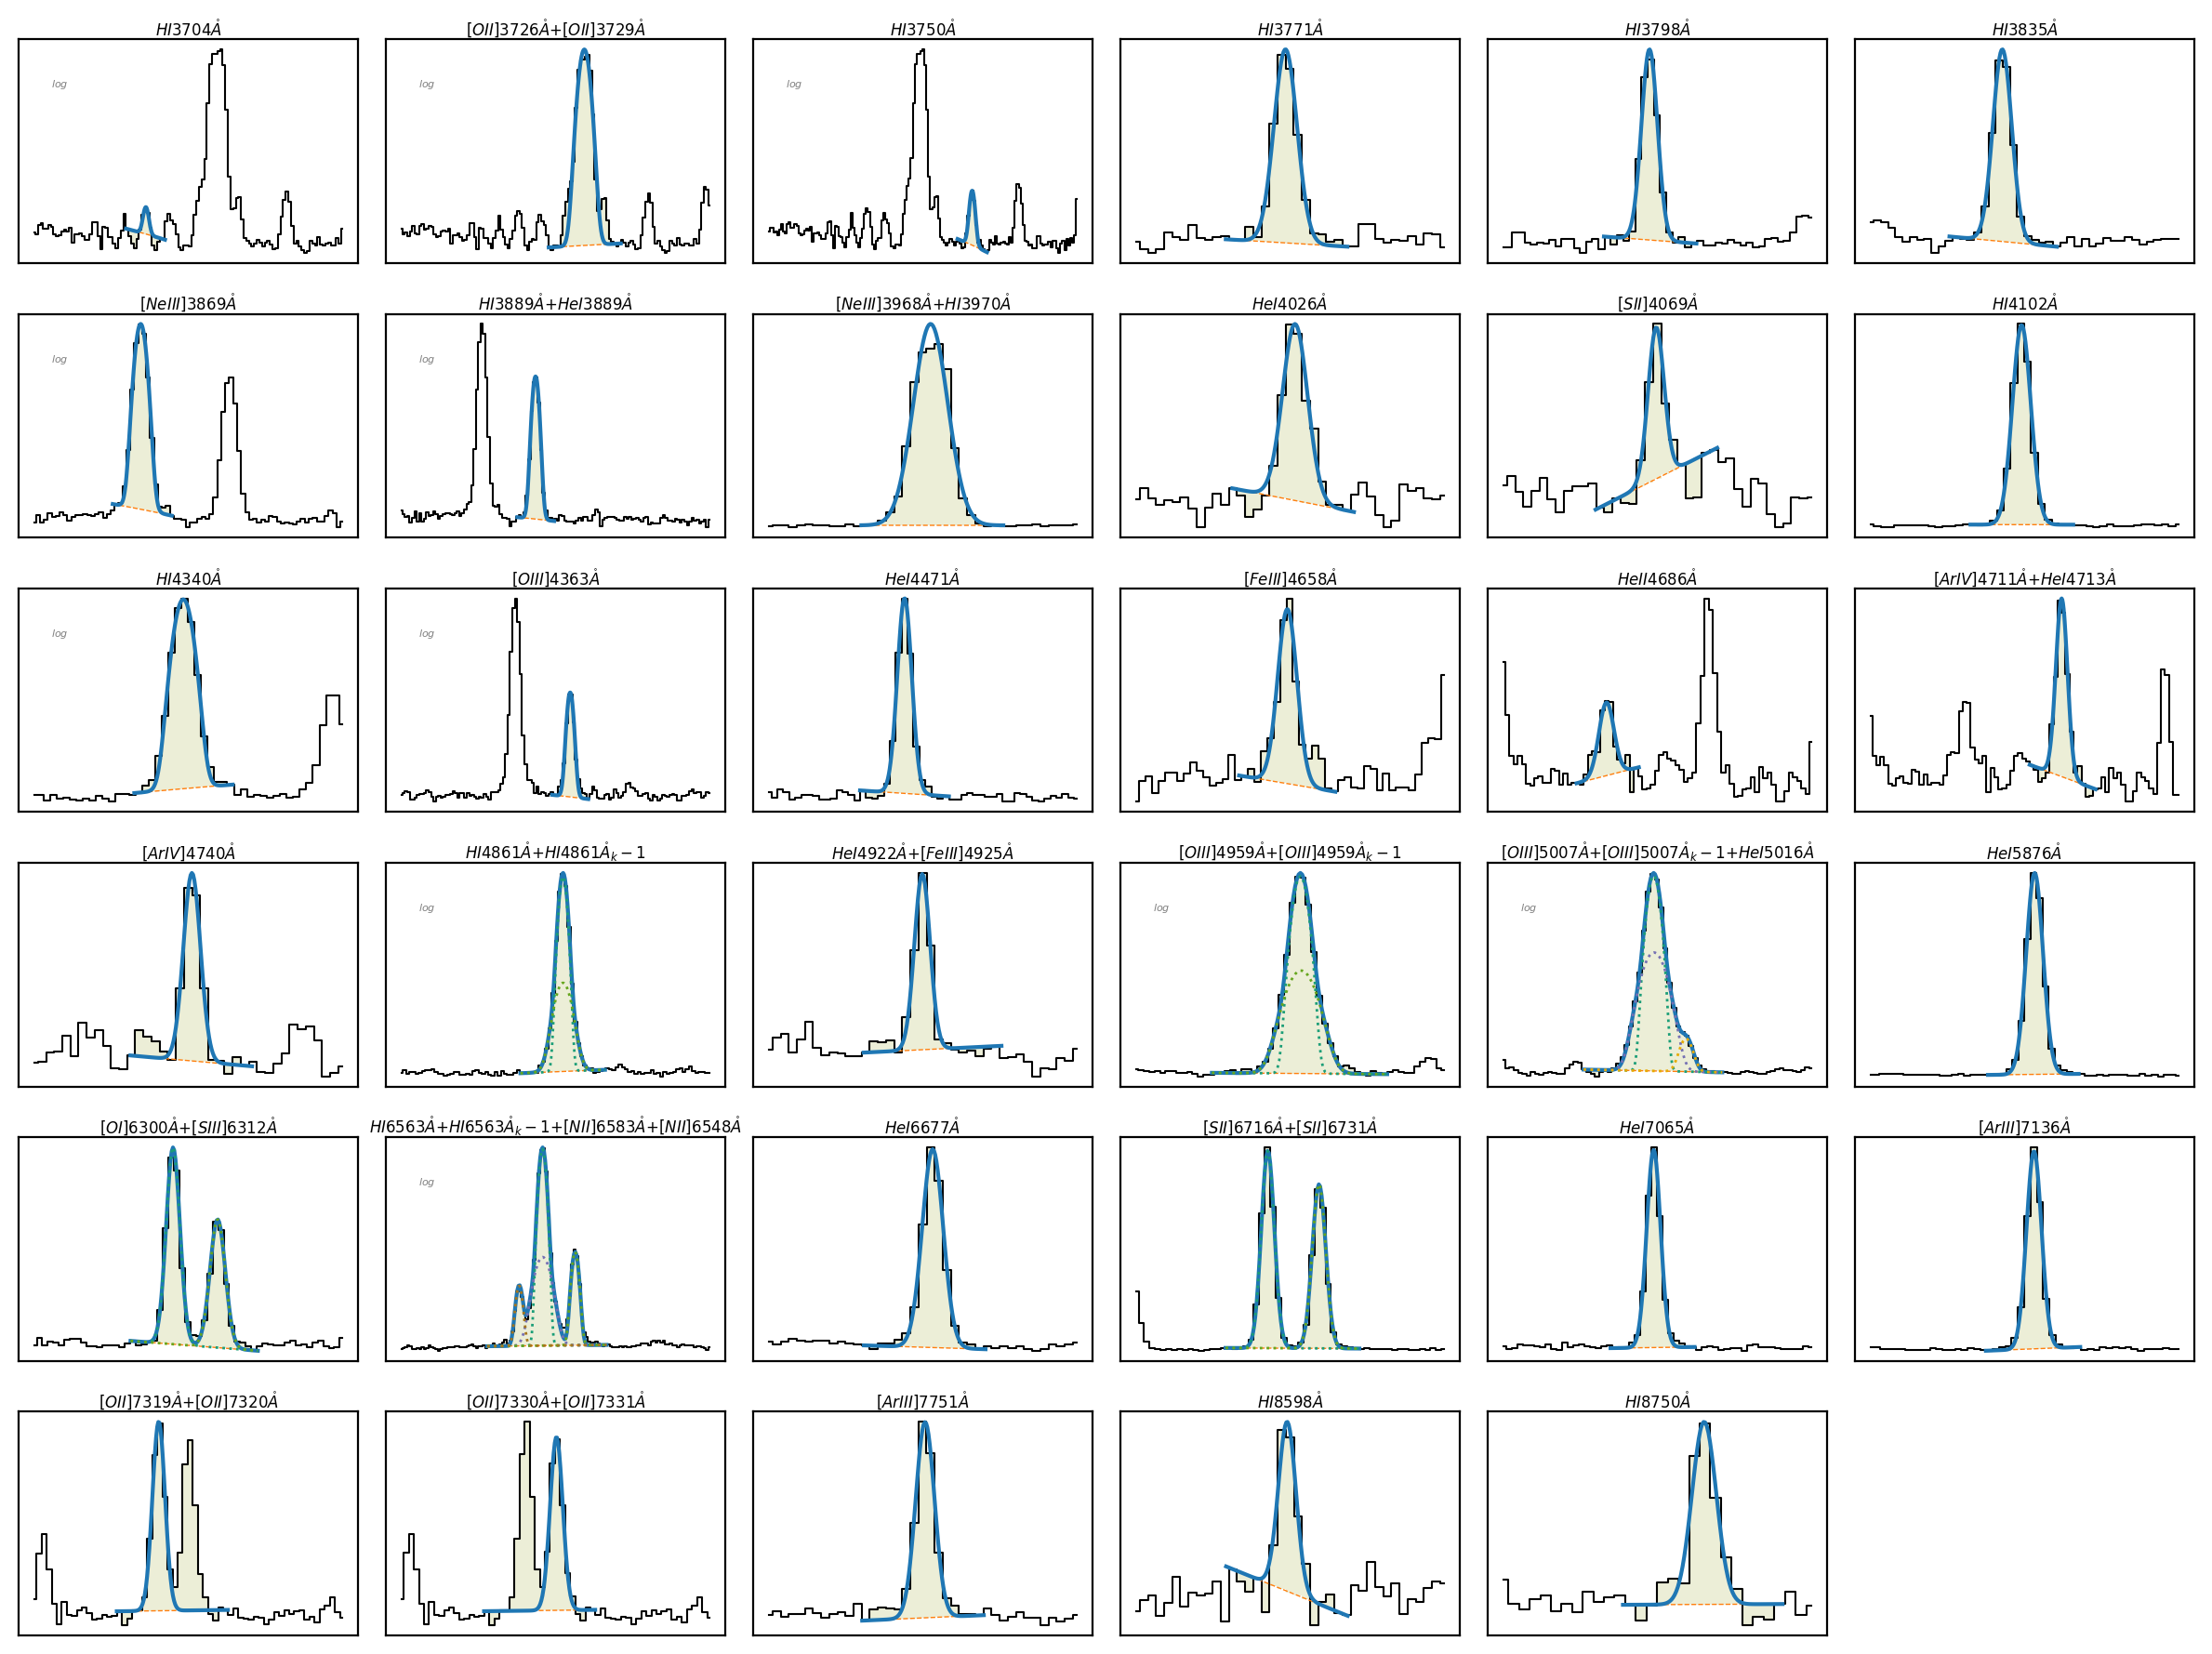

In [10]:
# Instrument - file dictionary
files_dict = {'osiris': 'gp121903_osiris.fits', 'isis': 'IZW18_isis.fits',
              'nirspec':'hlsp_ceers_jwst_nirspec_nirspec10-001027_comb-mgrat_v0.7_x1d-masked.fits', 'sdss':'SHOC579_SDSS_dr18.fits'}

# Instrument - object dictionary
object_dict = {'osiris':'gp121903', 'nirspec':'ceers1027', 'isis':'Izw18', 'sdss':'SHOC579'}

# Loop through the observations
for i, items in enumerate(object_dict.items()):

    inst, obj = items
    file_path = f'{data_folder}/{files_dict[inst]}'
    redshift = obs_cfg[inst][obj]['z']
    print('\n', obj, inst, redshift)

    # Create the observation object
    spec = lime.Spectrum.from_file(file_path, inst, redshift=redshift)

    # Unit conversion for NIRSPEC object
    if spec.units_wave != 'AA':
        spec.unit_conversion('AA', 'FLAM')

    # Revised bands for every object
    bands_df = spec.retrieve.lines_frame(band_vsigma = 100, map_band_vsigma = {'O2_3726A': 200, 'O2_3729A': 200,
                                                                               'H1_4861A': 200, 'H1_6563A': 200,
                                                                               'N2_6548A': 200, 'N2_6583A': 200,
                                                                               'O3_4959A': 250, 'O3_5007A': 250},
                                           fit_cfg=obs_cfg, obj_cfg_prefix=f'{obj}_{inst}',
                                           automatic_grouping=True, ref_bands=osiris_gp_df_path)

    # Fit the lines via continuum fitting and line thresholding.
    spec.fit.frame(bands_df, fit_cfg=obs_cfg, obj_cfg_prefix=f'{obj}_{inst}', line_detection=True)

    # Save the measurements
    spec.save_frame(f'../0_resources/results/{obj}_{inst}_line_frame.txt')

    # Plot the profiles.plot.grid()
    spec.plot.grid()


## Takeaways
* To measure multiple lines in a spectrum, you can use the [$\tt{lime.Spectrum.fit.frame}$](../3_explanations/0_measurements.rst) function.
* The first input (``bands``) is a [lines frame](../2_guides/1_prepare_line_bands.ipynb) containing the lines you want to fit.
    * By setting ``line_detection=True``, the function will run the continuum fitting and line thresholding using the parameters in ``fit_cfg``.
* The second input (``fit_cfg``) is a [configuration dictionary or file](../1_introduction/5_fitting_configuration.ipynb) containing the parameters for the fitting process.
* This function supports two configuration levels: a default configuration that serves as a baseline, and an object configuration for individual observations. You can specify the parameter sections for each configuration layer using the ``default_cfg_prefix`` and ``obj_cfg_prefix`` arguments.
* By default, the **object line fitting** updates the **default line fitting**. This minimizes the amount of writing needed in your configuration file. However, you can set ``update_default=False`` so that the object configuration is used as is, or falls back to the default configuration.
* You can read the function documentation in the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html).